# Descrição do Projeto

Você se saiu muito bem no curso do Practicum e recebeu uma oferta de estágio no
departamento analítico da Y.Afisha. Sua primeira tarefa é ajudar a empresa a otimizar
suas despesas com marketing.

Diários do servidor com dados sobre os acessos a Y.Afisha de janeiro de 2017 até
dezembro de 2018, arquivo de despejo com todos os pedidos feitos durante o período, estatísticas de despesas com marketing.

Como as pessoas usam o produto, quando elas começam a comprar, quanto dinheiro cada cliente traz para a empresa, quando as despesas serão cobertas.

## Carregando Dados

Importando Dataset e Bibliotecas

In [160]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
import pandas as pd

logs = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

### Explorando Dados

In [162]:
logs.info()

orders.info()

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 

In [163]:
logs.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [164]:
logs.tail(10)

,Device,End Ts,Source Id,Start Ts,Uid
359390,desktop,2017-12-11 17:54:19,1,2017-12-11 17:54:00,18268369011883553090
359391,touch,2017-08-30 11:53:19,2,2017-08-30 11:53:00,18304232853749481866
359392,desktop,2017-12-30 21:49:19,4,2017-12-30 21:49:00,18311497973035795342
359393,desktop,2017-06-08 07:49:19,4,2017-06-08 07:49:00,18325675073358289850
359394,touch,2017-11-06 08:00:19,4,2017-11-06 08:00:00,18332905065174083046
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485
359399,touch,2017-09-10 13:13:19,2,2017-09-10 13:13:00,18396128934054549559


In [165]:
orders.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [166]:
orders.tail(10)

,Buy Ts,Revenue,Uid
50405,2018-05-31 23:36:00,0.61,1551265230644458155
50406,2018-05-31 23:40:00,1.16,13121453305610619664
50407,2018-05-31 23:40:00,2.26,15576344609395725707
50408,2018-05-31 23:42:00,0.92,15854392578508828030
50409,2018-05-31 23:43:00,3.67,1805512004303848280
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247
50414,2018-06-01 00:02:00,3.42,83872787173869366


In [167]:
costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [168]:
costs.tail(10)

,source_id,dt,costs
2532,10,2018-05-22,21.70
2533,10,2018-05-23,7.42
2534,10,2018-05-24,10.79
2535,10,2018-05-25,22.21
2536,10,2018-05-26,7.89
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15
2541,10,2018-05-31,17.60


In [169]:
logs['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [170]:
logs['Source Id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64

In [171]:
costs['source_id'].value_counts()

5     364
2     363
4     363
10    363
1     363
3     363
9     363
Name: source_id, dtype: int64

No dataframe 'costs' podemos dizer que tivemos uma distribuição igual dos anuncios somente o anuncio 5 teve um a mais que os demais que é algo bom pois podemos analisar o impacto e custo de cada anuncio de forma igual, além de outros fatores. 

In [172]:
print("Valores nulos no DataFrame 'logs':")
print(logs.isnull().sum())

print("\nValores nulos no DataFrame 'orders':")
print(orders.isnull().sum())

print("\nValores nulos no DataFrame 'costs':")
print(costs.isnull().sum())

Valores nulos no DataFrame 'logs':
Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

Valores nulos no DataFrame 'orders':
Buy Ts     0
Revenue    0
Uid        0
dtype: int64

Valores nulos no DataFrame 'costs':
source_id    0
dt           0
costs        0
dtype: int64


Não temos valores nulos nos 3 dataframes. 

In [173]:
duplicates_logs = logs.duplicated().sum()
print(f"Número de duplicatas no DataFrame 'logs': {duplicates_logs}")

duplicates_orders = orders.duplicated().sum()
print(f"Número de duplicatas no DataFrame 'orders': {duplicates_orders}")

duplicates_costs = costs.duplicated().sum()
print(f"Número de duplicatas no DataFrame 'costs': {duplicates_costs}")

Número de duplicatas no DataFrame 'logs': 0
Número de duplicatas no DataFrame 'orders': 0
Número de duplicatas no DataFrame 'costs': 0


E também não temos duplicatas em nossos dataframes. 

### Tipos de Dados

Para otimizar os dados, precisamos alterar os tipos de dados das colunas "Device" para 'category', "Start Ts", "End Ts", "Buy Ts" e "dt" para 'datetime', isso é crucial para garantir que possamos realizar análises de dados temporais precisas e realizar operações relacionadas a datas e horas com facilidade.

In [174]:
logs['Device'] = logs['Device'].astype('category')

In [175]:
logs['Start Ts'] = pd.to_datetime(logs['Start Ts'])
logs['End Ts'] = pd.to_datetime(logs['End Ts'])
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [176]:
logs["date"] = logs['Start Ts'].dt.date
logs["week"] = logs['Start Ts'].dt.to_period('W')
logs["month"] = logs['Start Ts'].dt.to_period('M')

logs

,Device,End Ts,Source Id,Start Ts,Uid,date,week,month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18/2017-12-24,2017-12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19/2018-02-25,2018-02
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26/2017-07-02,2017-07
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14/2018-05-20,2018-05
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-25/2017-12-31,2017-12
...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,2017-07-24/2017-07-30,2017-07
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,2018-01-22/2018-01-28,2018-01
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,2018-02-26/2018-03-04,2018-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,2017-10-30/2017-11-05,2017-11


In [177]:
logs.info()

orders.info()

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
 5   date       359400 non-null  object        
 6   week       359400 non-null  period[W-SUN] 
 7   month      359400 non-null  period[M]     
dtypes: category(1), datetime64[ns](2), int64(1), object(1), period[M](1), period[W-SUN](1), uint64(1)
memory usage: 19.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64    

Agora os dataframes estão com o tipo de dado correto e otimizado para nossa análise. 

### Enriquecendo Dados

Vamos criar as colunas 'date', 'week' e 'month' no dataframe "logs", isso facilitrá nossas análises para entender o comportamento e frequência de uso de cada usuário.

In [178]:
logs['date'] = logs['Start Ts'].dt.to_period('D')
logs['week'] = logs['Start Ts'].dt.to_period('W')
logs['month'] = logs['Start Ts'].dt.to_period('M')
logs['year'] = logs['Start Ts'].dt.to_period('Y')


logs

,Device,End Ts,Source Id,Start Ts,Uid,date,week,month,year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18/2017-12-24,2017-12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19/2018-02-25,2018-02,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26/2017-07-02,2017-07,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14/2018-05-20,2018-05,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-25/2017-12-31,2017-12,2017
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,2017-07-24/2017-07-30,2017-07,2017
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,2018-01-22/2018-01-28,2018-01,2018
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,2018-02-26/2018-03-04,2018-03,2018
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,2017-10-30/2017-11-05,2017-11,2017


Agora vamos aplicar o mesmo no dataframe "orders" criando as colunas 'date', 'week' e 'month'. Isso irá ajudar a agrupar as compras por dia, semana e mês para obter informações sobre as compras e valores gastos pelos clientes de acordo com a semana, mês ou época do ano. 

In [179]:
orders['date'] = orders['Buy Ts'].dt.to_period('D')
orders['week'] = orders['Buy Ts'].dt.to_period('W')
orders['month'] = orders['Buy Ts'].dt.to_period('M')
orders['year'] = orders['Buy Ts'].dt.to_period('Y')

orders

,Buy Ts,Revenue,Uid,date,week,month,year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-05-29/2017-06-04,2017-06,2017
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-05-29/2017-06-04,2017-06,2017
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-05-29/2017-06-04,2017-06,2017
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-05-29/2017-06-04,2017-06,2017
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-05-29/2017-06-04,2017-06,2017
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-28/2018-06-03,2018-05,2018
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-28/2018-06-03,2018-05,2018
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-28/2018-06-03,2018-05,2018
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-28/2018-06-03,2018-05,2018


No dataframe "costs" também é necessário criar as colunas 'date', 'week' e 'month'.

In [180]:
costs['date'] = costs['dt'].dt.to_period('D')
costs['week'] = costs['dt'].dt.to_period('W')
costs['month'] = costs['dt'].dt.to_period('M')
costs['year'] = costs['dt'].dt.to_period('Y')
costs


,source_id,dt,costs,date,week,month,year
0,1,2017-06-01,75.20,2017-06-01,2017-05-29/2017-06-04,2017-06,2017
1,1,2017-06-02,62.25,2017-06-02,2017-05-29/2017-06-04,2017-06,2017
2,1,2017-06-03,36.53,2017-06-03,2017-05-29/2017-06-04,2017-06,2017
3,1,2017-06-04,55.00,2017-06-04,2017-05-29/2017-06-04,2017-06,2017
4,1,2017-06-05,57.08,2017-06-05,2017-06-05/2017-06-11,2017-06,2017
...,...,...,...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-27,2018-05-21/2018-05-27,2018-05,2018
2538,10,2018-05-28,21.26,2018-05-28,2018-05-28/2018-06-03,2018-05,2018
2539,10,2018-05-29,11.32,2018-05-29,2018-05-28/2018-06-03,2018-05,2018
2540,10,2018-05-30,33.15,2018-05-30,2018-05-28/2018-06-03,2018-05,2018


In [181]:
logs.rename(columns={'Source Id': 'source_id'}, inplace=True)
logs.rename(columns={'Start Ts': 'start_ts'}, inplace=True)
logs.rename(columns={'End Ts': 'end_ts'}, inplace=True)
logs.rename(columns={'Uid': 'uid'}, inplace=True)
orders.rename(columns={'Uid': 'uid'}, inplace=True)
orders.rename(columns={'Buy Ts': 'buy_ts'}, inplace=True)
orders.rename(columns={'Revenue': 'revenue'}, inplace=True)


Foi alterados as colunas 'Source Id', 'Starts Ts', 'End Ts', 'Buy Ts', 'Revenue' para deixar as colunas em letras minúculas e sem espaços. 

In [182]:
logs.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
 5   date       359400 non-null  period[D]     
 6   week       359400 non-null  period[W-SUN] 
 7   month      359400 non-null  period[M]     
 8   year       359400 non-null  period[A-DEC] 
dtypes: category(1), datetime64[ns](2), int64(1), period[A-DEC](1), period[D](1), period[M](1), period[W-SUN](1), uint64(1)
memory usage: 22.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   5041

Agora nossos dados estão prontos para ser analisado. 

## Fazendo Relatórios e Metrícas

### Produto

#### Quantas pessoas utilizam a cada dia, semana e mês:

In [183]:
dau = logs.groupby("date").agg({"uid": "nunique"})
print("Média de Usuários por Dia:", dau.mean())

Média de Usuários por Dia: uid    907.991758
dtype: float64


<Figure size 1008x648 with 0 Axes>

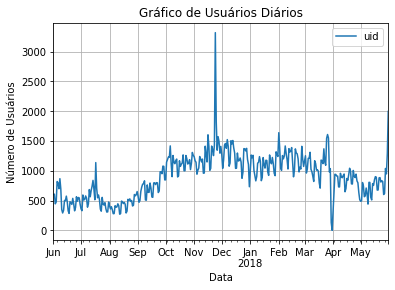

In [184]:
plt.figure(figsize=(14, 9))  
dau.plot(kind='line', title='Usuários Diários')
plt.xlabel('Data')
plt.ylabel('Número de Usuários')
plt.title('Gráfico de Usuários Diários')  
plt.grid()
plt.show()



In [185]:
wau = logs.groupby("week").agg({"uid": "nunique"})

print("Média de Usuários por Semana:", wau.mean())

Média de Usuários por Semana: uid    5716.245283
dtype: float64


<Figure size 1008x576 with 0 Axes>

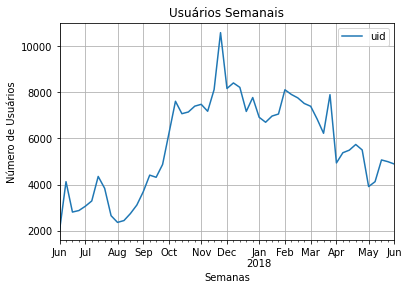

In [186]:
plt.figure(figsize=(14, 8))
wau.plot(kind='line', title='Usuários Semanais')
plt.xlabel('Semanas')
plt.ylabel('Número de Usuários')
plt.grid()
plt.show()

In [187]:
mau = logs.groupby("month").agg({"uid": "nunique"})
print("Média de Usuários por Mês:", mau.mean())

Média de Usuários por Mês: uid    23228.416667
dtype: float64


<Figure size 864x432 with 0 Axes>

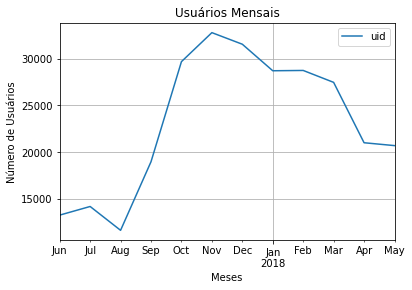

In [188]:
plt.figure(figsize=(12, 6))
mau.plot(kind='line', title='Usuários Mensais')
plt.xlabel('Meses')
plt.ylabel('Número de Usuários')
plt.grid()
plt.show()

#### Acessos por Usuário

In [189]:
sessions_per_user = logs.groupby('date').agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sess_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']

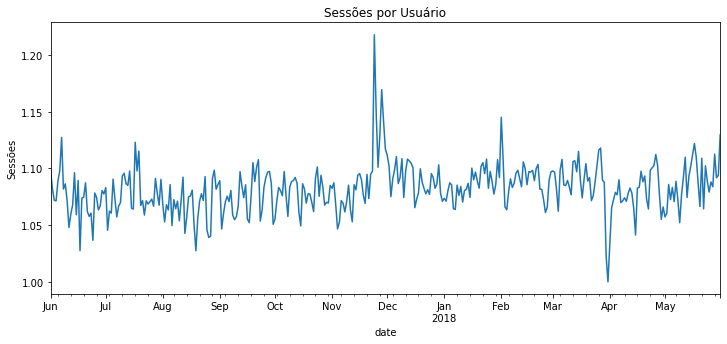

In [190]:
plt.figure(figsize= (12,5))
sessions_per_user['sess_per_user'].plot().set(title = 'Sessões por Usuário', xlabel = 'date', ylabel = 'Sessões');

In [191]:
print('Médias de sessões por usuário por dia: {}'.format(round(sessions_per_user['sess_per_user'].mean(),2)))

Médias de sessões por usuário por dia: 1.08


Nossos usuários não acessam com grande frequência no mesmo dia. 

#### Qual comprimento tem cada sessão?

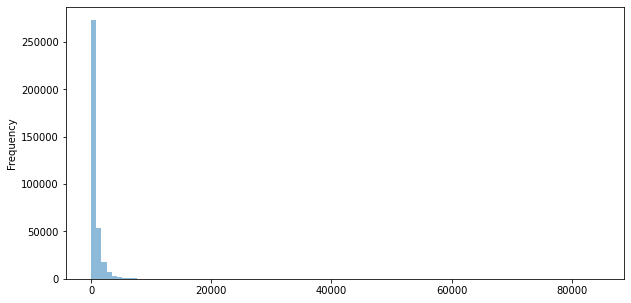

In [192]:
logs['duration'] = (logs['end_ts'] - logs['start_ts']).dt.seconds
logs['duration'].plot(kind="hist", figsize=(10, 5), bins=100, alpha=0.5)
plt.show()

In [193]:
average_session_duration = logs['duration'].mean()

print("Média da duração de cada sessão (em segundos):", average_session_duration)

Média da duração de cada sessão (em segundos): 643.506488592098


#### Retenção de Usuários

Vamos criar a coluna com o primeiro mês de acesso e após isso criar uma nova coluna com os mês seguintes de acesso para encontrar a quantidade de clientes que retornam mensalmente de acordo com seu mês de primeiro acesso. 

In [194]:
first_visits = logs.groupby("uid").agg({"month": "min"}).reset_index().rename(columns={"month": "first_month"})
logs_visits = logs.merge(first_visits, on="uid", how="left")
logs_visits.head()

,Device,end_ts,source_id,start_ts,uid,date,week,month,year,duration,first_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18/2017-12-24,2017-12,2017,1080,2017-12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19/2018-02-25,2018-02,2018,1680,2018-02
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26/2017-07-02,2017-07,2017,0,2017-07
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14/2018-05-20,2018-05,2018,1440,2018-03
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-25/2017-12-31,2017-12,2017,0,2017-12


In [195]:
logs_visits["months_diff"] = logs_visits["month"].astype(int) - logs_visits["first_month"].astype(int)
logs_visits.head()

,Device,end_ts,source_id,start_ts,uid,date,week,month,year,duration,first_month,months_diff
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18/2017-12-24,2017-12,2017,1080,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19/2018-02-25,2018-02,2018,1680,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26/2017-07-02,2017-07,2017,0,2017-07,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14/2018-05-20,2018-05,2018,1440,2018-03,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-25/2017-12-31,2017-12,2017,0,2017-12,0


In [196]:
retention_table = logs_visits.pivot_table(
    index="first_month",
    columns="months_diff",
    values="uid",
    aggfunc="nunique"
)
retention_table.fillna("")

months_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02,22197.0,1267.0,565.0,446.0,,,,,,,,


Podemos notar que há uma queda já no primeito mês seguinte ao primeiro acesso dos usuário e notamos que nem 10% retornam e acessam novamente. 

In [197]:
retention_rates = retention_table.copy()
for col in retention_rates.columns[1:]:
  retention_rates[col] = retention_rates[col] / retention_rates[0]

retention_rates[0] = retention_rates[0]/retention_rates[0]

retention_rates.fillna("")

months_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,,
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.03586,0.024186,0.022809,,,
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,,,,
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.0218,,,,,
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,,,,,,
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,,,,,,,
2018-02,1.0,0.05708,0.025454,0.020093,,,,,,,,


Podemos notar que nem 10% dos usuários retornam nos meses seguintes ao seu primeiro acesso e que há um crecimento após alguns meses com clientes voltando a realizar acessos novamente após alguns meses e isso pode indicar que há uma certa procura em uma época do ano em específico. 

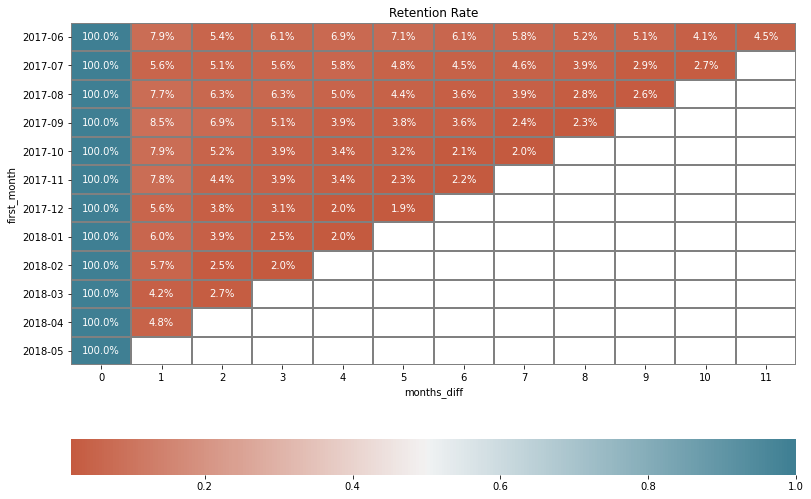

In [198]:
plt.figure(figsize=(13, 9))
sns.heatmap(retention_rates, annot=True, fmt='.1%', linewidths=1, linecolor='grey', center = 0.5, vmax=1.0, cmap=sns.diverging_palette(20, 220, as_cmap=True), cbar_kws= {'orientation': 'horizontal'}).set(title = 'Retention Rate')
plt.show()

####  Com que frequência os usuários voltam?

In [199]:
dau_total = logs.groupby('date').agg({'uid': 'nunique'}).mean()
wau_total = logs.groupby(['year', 'week']).agg({'uid': 'nunique'}).mean()
mau_total = logs.groupby(['year', 'month']).agg({'uid': 'nunique'}).mean()

sticky_wau = dau_total / wau_total * 100
sticky_mau = dau_total / mau_total * 100

print("Frequência que os usuários voltar por semana:", sticky_wau)
print("Frequência que os usuários voltar por mês:", sticky_mau)

Frequência que os usuários voltar por semana: uid    15.884409
dtype: float64
Frequência que os usuários voltar por mês: uid    3.90897
dtype: float64


### Vendas

#### Quando as pessoas começam a comprar?

In [200]:
first_visit = logs.groupby('uid')['start_ts'].min()
first_buy = orders.groupby('uid')['buy_ts'].min()

time_to_buy = pd.concat([first_visit, first_buy], axis=1)
time_to_buy.columns = ['first_visit', 'first_buy']

time_to_buy['time'] = time_to_buy['first_buy'] - time_to_buy['first_visit']
time_to_buy['time'] = time_to_buy['time'].dt.days


time_to_buy['time'].mean()

16.7298688497659

Este é o tempo médio em dias a partir do primeiro acesso até a primeira compra de um usuário, isso mostra que alguns clientes podem ter realizado pedidos assim que fez seu primeiro acesso, porém alguns pode ter demorado até meses para realizar seu primeiro pedido após o primeiro acesso. 

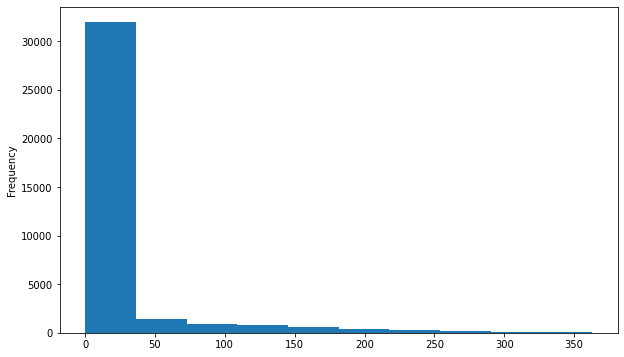

In [201]:
time_to_buy['time'].plot(kind="hist", figsize=(10, 6), bins=10)
plt.show()

#### Quantos pedidos os clientes fazem durante um determinado período de tempo?

Vamos definir um periodo de Outubro de 2017 a Marco de 2018 para nossa análise

In [202]:
start_date = '2017-10-01'
end_date = '2018-02-01'

filtered_orders = orders[(orders['buy_ts'] >= start_date) & (orders['buy_ts'] <= end_date)]

orders_per_customer = filtered_orders.groupby('uid')['buy_ts'].count()

orders_per_customer.mean()

1.317853762423095

O resultado obtido de (1.31) significa que, em média, os pedidos realizados durante o período de Outubro a Fevereiro. Isso mostra que a maioria dos clientes fez apenas um pedido durante esse período, com uma pequena parte realizando dois ou mais pedidos.

#### Volume médio de compra

In [203]:
average_purchase = orders['revenue'].mean()
print("O volume médio de uma compra é:", average_purchase)

O volume médio de uma compra é: 4.999646930477041


Isso indica que, em média, os usuários gastam cerca de 4.99 por compra. Esse valor pode ser útil para entender e analisar o comportamento dos clientes e o valor médio que eles gastam em cada transação, e pode nos ajudar a traçar estratégias de precificação e marketing.

#### Quanto dinheiro eles trazem para a empresa (LTV)

In [204]:
first_order = first_visits.merge(orders, on="uid", how="left")
first_order = first_order.dropna()

first_order["months_diff"] = (first_order["month"].astype(int) - first_order["first_month"].astype(int))

first_order.head()

,uid,first_month,buy_ts,revenue,date,week,month,year,months_diff
3,313578113262317,2017-09,2018-01-03 21:51:00,0.55,2018-01-03,2018-01-01/2018-01-07,2018-01,2018,4
22,1575281904278712,2017-06,2017-06-03 10:13:00,1.22,2017-06-03,2017-05-29/2017-06-04,2017-06,2017,0
23,1575281904278712,2017-06,2017-06-03 17:39:00,1.83,2017-06-03,2017-05-29/2017-06-04,2017-06,2017,0
36,2429014661409475,2017-10,2017-10-11 18:33:00,73.33,2017-10-11,2017-10-09/2017-10-15,2017-10,2017,0
37,2464366381792757,2018-01,2018-01-28 15:54:00,2.44,2018-01-28,2018-01-22/2018-01-28,2018-01,2018,0


In [205]:
purchase_by_user = first_order.groupby(["uid", "first_month", "months_diff"]).agg({"revenue": "sum"}).reset_index()
purchase_by_user.sort_values(by=["uid", "months_diff"]).head()

,uid,first_month,months_diff,revenue
0,313578113262317,2017-09,4,0.55
1,1575281904278712,2017-06,0,3.05
2,2429014661409475,2017-10,0,73.33
3,2464366381792757,2018-01,0,2.44
4,2551852515556206,2017-11,0,10.99


In [206]:
costs_by_month = purchase_by_user.pivot_table(
    index="first_month",
    columns="months_diff",
    values="revenue",
    aggfunc="sum"
)

In [207]:
costs_by_month

months_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06,9557.49,2664.58,1464.69,3882.09,3940.59,2824.48,3489.95,2270.81,2317.91,3481.64,2204.01,1927.81
2017-07,9874.89,1059.28,1108.90,982.96,846.99,798.08,588.00,770.30,724.52,591.03,467.16,NaN
2017-08,6234.81,997.32,1001.35,946.21,810.04,532.90,486.65,1246.23,830.64,375.72,NaN,NaN
2017-09,12357.20,3700.48,2110.63,10438.93,1288.48,1910.05,966.84,491.38,418.57,NaN,NaN,NaN
2017-10,18362.32,3809.83,1327.02,1058.05,1043.47,1022.19,578.91,655.90,NaN,NaN,NaN,NaN
2017-11,16531.79,2667.58,1342.85,1369.53,1108.74,707.63,698.60,NaN,NaN,NaN,NaN,NaN
2017-12,16857.00,1739.03,4198.30,5123.82,1457.57,1782.13,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,10597.01,1951.70,1164.76,305.88,527.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,11512.63,1984.46,663.19,901.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Estes são os valores comprados mensalmente pelos usuários de acordo com seu primeiro mês de compra em diante. Podemos notar que os usuários que fizeram a primeira compra em 2017-09 e 2017-12 tiveram quedas após seu primeiro mês de compra mas retornaram com um valor superior aos meses anteriores com um pico para os clientes de 2017-09 no seu mês 3 e para os clientes 2017-12 em seus meses 2 e 3 de vida. 

Analisando os clientes de 2017-06 podemos notar que eles podem ter a tendência de retornam após um certo período, pois para o clientes de 2017-06 houve queda após seu primeiro mês, porém houve um aumento nos valores de compras nos meses 3 e 4 de vida e houve quedas e aumentos em meses seguintes 6 e 9 de vida. 

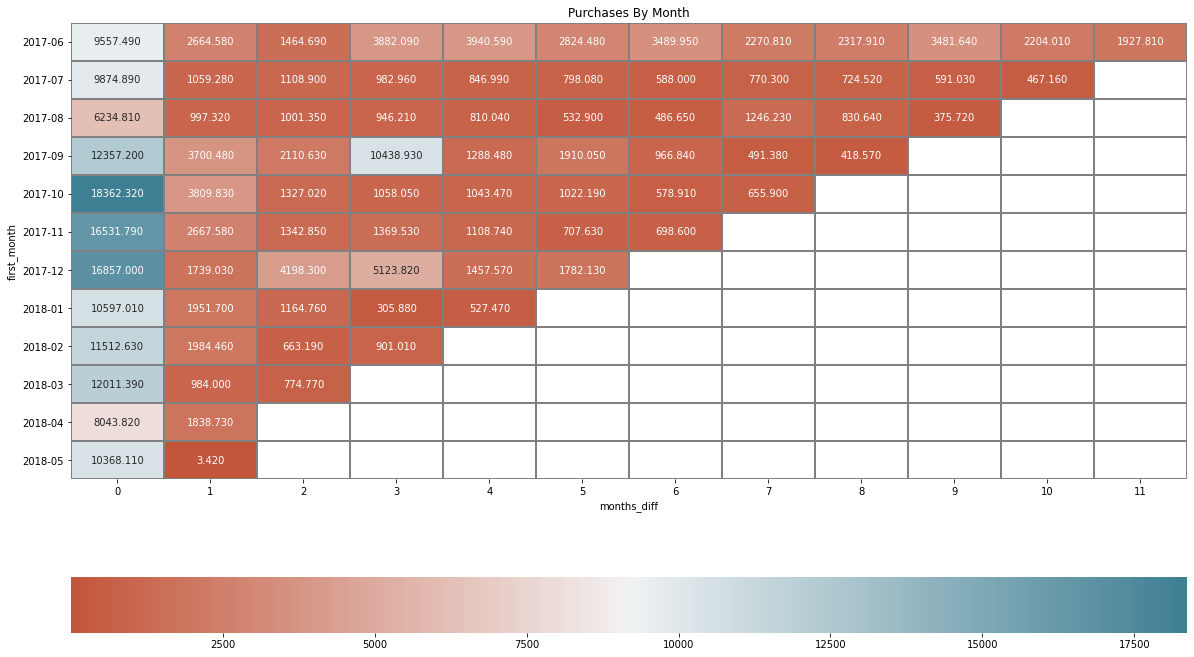

In [232]:
fig, ax = plt.subplots(figsize = (20,12))
costs_by_month.index= costs_by_month.index.astype(str)
sns.heatmap(costs_by_month, annot=True, fmt='.3f', linewidths=1, linecolor='grey', cmap=sns.diverging_palette(20, 220, as_cmap=True), cbar_kws={'orientation':'horizontal'}).set(title = "Purchases By Month")

plt.show()

Agora vamos calcular o LTV: 

In [209]:
first_orders_data = orders.groupby("uid").agg({"buy_ts": "min"}).reset_index().rename(columns={"buy_ts": "first_purchase"})
first_orders_data.head()

,uid,first_purchase
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [210]:
first_order.head(15)

,uid,first_month,buy_ts,revenue,date,week,month,year,months_diff
3,313578113262317,2017-09,2018-01-03 21:51:00,0.55,2018-01-03,2018-01-01/2018-01-07,2018-01,2018,4
22,1575281904278712,2017-06,2017-06-03 10:13:00,1.22,2017-06-03,2017-05-29/2017-06-04,2017-06,2017,0
23,1575281904278712,2017-06,2017-06-03 17:39:00,1.83,2017-06-03,2017-05-29/2017-06-04,2017-06,2017,0
36,2429014661409475,2017-10,2017-10-11 18:33:00,73.33,2017-10-11,2017-10-09/2017-10-15,2017-10,2017,0
37,2464366381792757,2018-01,2018-01-28 15:54:00,2.44,2018-01-28,2018-01-22/2018-01-28,2018-01,2018,0
39,2551852515556206,2017-11,2017-11-24 10:14:00,6.32,2017-11-24,2017-11-20/2017-11-26,2017-11,2017,0
40,2551852515556206,2017-11,2017-11-24 11:24:00,4.67,2017-11-24,2017-11-20/2017-11-26,2017-11,2017,0
45,3077748354309989,2018-03,2018-03-03 12:33:00,4.67,2018-03-03,2018-02-26/2018-03-04,2018-03,2018,0
54,3605148382144603,2017-08,2017-09-21 20:56:00,0.12,2017-09-21,2017-09-18/2017-09-24,2017-09,2017,1
55,3605148382144603,2017-08,2017-09-21 22:44:00,0.24,2017-09-21,2017-09-18/2017-09-24,2017-09,2017,1


In [211]:
first_orders_data

,uid,first_purchase
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


In [212]:
first_orders_data['first_purchase_month'] = first_orders_data['first_purchase'].dt.to_period("M")
cohort_sizes = first_orders_data.groupby('first_purchase_month')['uid'].nunique().reset_index().rename(columns = {'uid' : 'n_buyers', 'first_purchase_month' : 'first_month'})

cohort = pd.merge(first_order, right = cohort_sizes, on = 'first_month')
cohort['LTV'] = cohort['revenue'] / cohort['n_buyers']

In [213]:
ltv = cohort.pivot_table(
    index='first_month',
    columns='months_diff',
    values='LTV',
    aggfunc='sum'
).cumsum(axis=1)

ltv.round(2).fillna('')

months_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06,4.72,6.04,6.77,8.68,10.63,12.03,13.75,14.88,16.02,17.74,18.83,19.79
2017-07,5.14,5.69,6.26,6.77,7.21,7.63,7.94,8.34,8.71,9.02,9.26,
2017-08,4.55,5.28,6.01,6.7,7.29,7.68,8.04,8.95,9.55,9.83,,
2017-09,4.79,6.22,7.04,11.08,11.58,12.32,12.7,12.89,13.05,,,
2017-10,4.23,5.11,5.41,5.66,5.9,6.13,6.27,6.42,,,,
2017-11,4.05,4.70,5.03,5.37,5.64,5.81,5.99,,,,,
2017-12,3.85,4.24,5.2,6.37,6.7,7.11,,,,,,
2018-01,3.14,3.72,4.07,4.16,4.31,,,,,,,
2018-02,3.15,3.70,3.88,4.13,,,,,,,,


Nossos clientes realizam compras baixas e mesmo após um ano de seu primeiro acesso eles em média não realizam mais de 20 dólares que é um valor signitivamente baixo. Somente clientes que fizeram sua primeira compra nos meses de 2017-06 e 2017-09 tiveram o LTV superior a 10. 

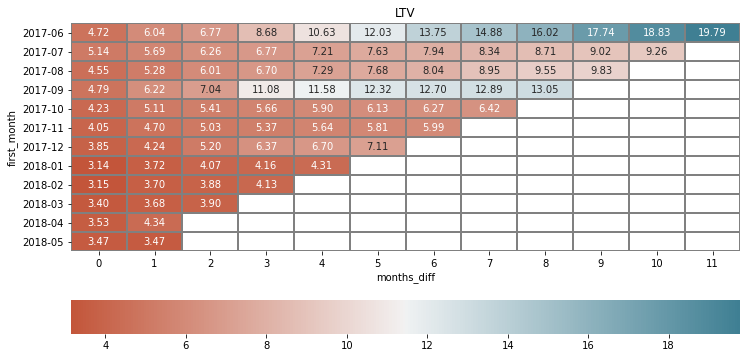

In [214]:
fig, ax = plt.subplots(figsize = (12,6))
ltv.index=ltv.index.astype(str)
sns.heatmap(ltv, annot=True, fmt='.2f', linewidths=1, linecolor='grey',  cmap=sns.diverging_palette(20, 220, as_cmap=True), cbar_kws= {'orientation': 'horizontal'}
            ).set(title ='LTV')
plt.show()

### Marketing

#### Quanto Dinheiro foi gasto

In [215]:
total_spent = costs['costs'].sum()
print("Total de gastos em marketing: ${:.2f}".format(total_spent))

Total de gastos em marketing: $329131.62


Este valor representa o custo total que a empresa gastou em marketing ao longo do período analisado. Essa é uma métrica fundamental para entender o investimento em marketing e pode ser usada para calcular o retorno sobre o investimento (ROI) das campanhas de marketing.

In [216]:
gastos_por_origem = costs.groupby('source_id')['costs'].sum()
print("Gastos por origem:\n", gastos_por_origem)

Gastos por origem:
 source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


Em gastos por origem de anuncio, temos grande diferença nos valores investidos, e fica claro que houve um foco maior em alguns tipos de marketing pois todos os anuncios tiveram ao decorrer do tempo praticamente a mesma quantidade de anuncios, porém não foi seguido a mesma regra para os valores investidos em cada origem.


#### Quanto custou a aquisição de clientes para cada origem?

In [217]:
costs.head()

,source_id,dt,costs,date,week,month,year
0,1,2017-06-01,75.20,2017-06-01,2017-05-29/2017-06-04,2017-06,2017
1,1,2017-06-02,62.25,2017-06-02,2017-05-29/2017-06-04,2017-06,2017
2,1,2017-06-03,36.53,2017-06-03,2017-05-29/2017-06-04,2017-06,2017
3,1,2017-06-04,55.00,2017-06-04,2017-05-29/2017-06-04,2017-06,2017
4,1,2017-06-05,57.08,2017-06-05,2017-06-05/2017-06-11,2017-06,2017


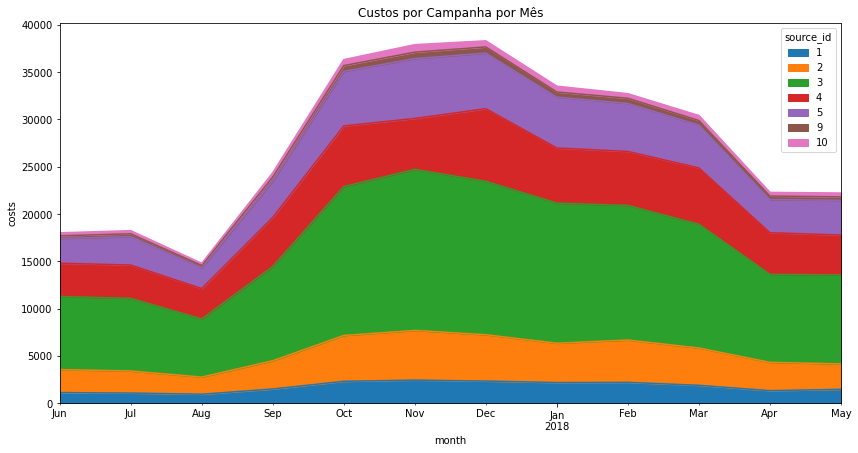

In [218]:
(costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum')
      .plot
      .area(figsize=(14,7), title='Custos por Campanha por Mês', xlabel = 'month', ylabel = 'costs'))
plt.show()

In [219]:
print("CAC médio é:", round(costs['costs'].sum() / orders['uid'].nunique(), 2))

CAC médio é: 9.01


O CAC total de todos os custos de marketing ao longo do período de junho de 2017 a junho de 2018 e dividindo pelo número total de novos clientes nesse período. O resultado é aproximadamente $9.01 por cliente adquirido.

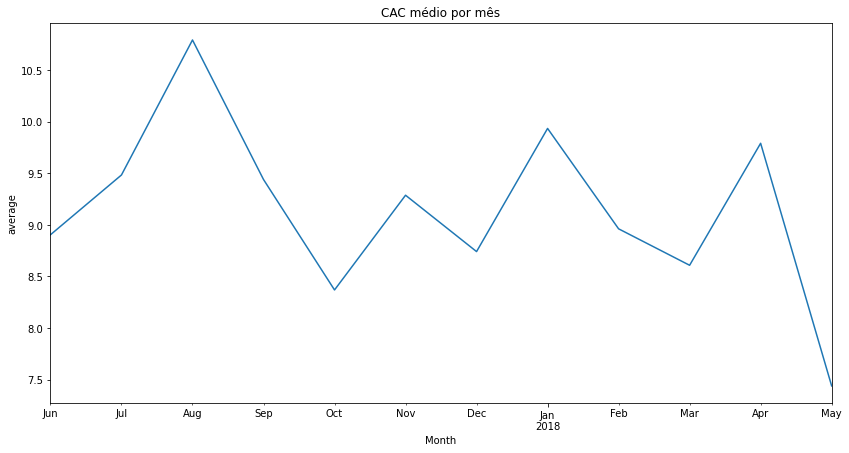

In [220]:
CAC_by_month = pd.merge(costs.groupby('month').agg({'costs': 'sum'}),
                        first_orders_data.groupby('first_purchase_month').agg({'uid': 'nunique'}),
                        left_index=True,
                        right_index=True)

CAC_by_month['cac_per_month'] = CAC_by_month['costs']  / CAC_by_month['uid']

CAC_by_month['cac_per_month'].plot(figsize=(14,7), title='CAC médio por mês', xlabel = 'Month', ylabel = 'average');

Podemos notar que o CAC foi maior em Agosto e menos em meses como Outubro, Novembro e Dezembro, que foram meses onde houve um investimento maior nas campanhas de marketing. 

#### Os investimentos valeram a pena? (ROI)

In [221]:
user_source = logs[['uid', 'source_id']].drop_duplicates()
first_orders_data = pd.merge(first_orders_data, user_source, on= 'uid')

In [222]:
month_revenue = orders.groupby(['uid', 'month']).agg({'revenue': 'sum'}).reset_index()
buyers = first_orders_data.merge(month_revenue,on = 'uid')
buyers.head()

,uid,first_purchase,first_purchase_month,source_id,month,revenue
0,313578113262317,2018-01-03 21:51:00,2018-01,2,2018-01,0.55
1,1575281904278712,2017-06-03 10:13:00,2017-06,10,2017-06,3.05
2,2429014661409475,2017-10-11 18:33:00,2017-10,3,2017-10,73.33
3,2464366381792757,2018-01-28 15:54:00,2018-01,5,2018-01,2.44
4,2551852515556206,2017-11-24 10:14:00,2017-11,5,2017-11,10.99


In [223]:
total_purchase = orders['revenue'].sum()

roi = total_purchase / total_spent * 100

roi

76.58249304639888

Tivemos o retorno de somente 76,58% de todo o valor investido nas campanhas de marketing, isso mostra que os valores gastos pelos usuários em média é relativamente baixo para gerar lucros para a empresa. 

In [224]:
total_revenue = orders['revenue'].sum()
total_costs = costs['costs'].sum()

roi = (total_revenue - total_costs) / total_costs 

print(f'O ROI é de: {roi:.2%}')

O ROI é de: -23.42%


O resultado do ROI é de -23.42%. Isso significa que, com base nas informações disponíveis, os custos totais de marketing superaram o lucro total gerado pelas vendas.

A magnitude de -23.42% indica que, para cada unidade de moeda gasta em marketing, a empresa perdeu 23.42% do valor em relação ao lucro gerado. Em outras palavras, para cada 1 gasto, a empresa teve um prejuízo de aproximadamente 0.23. 

Isso sugere que os investimentos em marketing não geraram o retorno esperado e que a empresa está operando com prejuízo nesse contexto específico.

Vamos analisar o ROI para cada campanha de marketing e encontrar quais campanhas estão causando prejuízo. 

In [225]:
costs

,source_id,dt,costs,date,week,month,year
0,1,2017-06-01,75.20,2017-06-01,2017-05-29/2017-06-04,2017-06,2017
1,1,2017-06-02,62.25,2017-06-02,2017-05-29/2017-06-04,2017-06,2017
2,1,2017-06-03,36.53,2017-06-03,2017-05-29/2017-06-04,2017-06,2017
3,1,2017-06-04,55.00,2017-06-04,2017-05-29/2017-06-04,2017-06,2017
4,1,2017-06-05,57.08,2017-06-05,2017-06-05/2017-06-11,2017-06,2017
...,...,...,...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-27,2018-05-21/2018-05-27,2018-05,2018
2538,10,2018-05-28,21.26,2018-05-28,2018-05-28/2018-06-03,2018-05,2018
2539,10,2018-05-29,11.32,2018-05-29,2018-05-28/2018-06-03,2018-05,2018
2540,10,2018-05-30,33.15,2018-05-30,2018-05-28/2018-06-03,2018-05,2018


In [226]:
buyers


,uid,first_purchase,first_purchase_month,source_id,month,revenue
0,313578113262317,2018-01-03 21:51:00,2018-01,2,2018-01,0.55
1,1575281904278712,2017-06-03 10:13:00,2017-06,10,2017-06,3.05
2,2429014661409475,2017-10-11 18:33:00,2017-10,3,2017-10,73.33
3,2464366381792757,2018-01-28 15:54:00,2018-01,5,2018-01,2.44
4,2551852515556206,2017-11-24 10:14:00,2017-11,5,2017-11,10.99
...,...,...,...,...,...,...
69938,18446156210226471712,2018-02-18 19:34:00,2018-02,3,2018-02,9.78
69939,18446156210226471712,2018-02-18 19:34:00,2018-02,4,2018-02,9.78
69940,18446156210226471712,2018-02-18 19:34:00,2018-02,1,2018-02,9.78
69941,18446156210226471712,2018-02-18 19:34:00,2018-02,5,2018-02,9.78


In [227]:
revenue_gp = buyers.groupby(['source_id', 'month']).agg({'revenue': 'sum'}).reset_index()
revenue_gp


,source_id,month,revenue
0,1,2017-06,2563.84
1,1,2017-07,3947.25
2,1,2017-08,3325.64
3,1,2017-09,8193.42
4,1,2017-10,11466.14
...,...,...,...
81,10,2018-01,466.84
82,10,2018-02,671.89
83,10,2018-03,1159.97
84,10,2018-04,674.07


In [228]:
costs_grouped = costs.groupby(['source_id','month']).agg({'costs': 'sum'})

roi_source = pd.merge(costs_grouped,revenue_gp,on=['source_id','month'])
roi_source

,source_id,month,costs,revenue
0,1,2017-06,1125.61,2563.84
1,1,2017-07,1072.88,3947.25
2,1,2017-08,951.81,3325.64
3,1,2017-09,1502.01,8193.42
4,1,2017-10,2315.75,11466.14
...,...,...,...,...
79,10,2018-01,614.35,466.84
80,10,2018-02,480.88,671.89
81,10,2018-03,526.41,1159.97
82,10,2018-04,388.25,674.07


In [229]:
roi_source['ROI'] = (roi_source['revenue'] - roi_source['costs']) / roi_source['costs']

loss_making_campaigns = roi_source[roi_source['ROI'] < 0]

roi_source['ROI'].mean()

loss_making_campaigns

,source_id,month,costs,revenue,ROI
24,3,2017-06,7731.65,4165.12,-0.461290
25,3,2017-07,7674.37,5257.28,-0.314956
26,3,2017-08,6143.54,3958.83,-0.355611
27,3,2017-09,9963.55,9883.38,-0.008046
28,3,2017-10,15737.24,12349.31,-0.215281
29,3,2017-11,17025.34,12698.96,-0.254114
31,3,2018-01,14808.78,9717.86,-0.343777
32,3,2018-02,14228.56,10795.07,-0.241310
33,3,2018-03,13080.85,12355.12,-0.055480
34,3,2018-04,9296.81,7854.86,-0.155102


Tivemos somente duas campanhas com ROI negativo e em particular a campanha 3 que é a que mais teve investimento porém somente em 1 mês 2017-12 não teve seu ROI negativo, nos meses restantes todos foram negativos e devido seu investimento acima do normal em comparação com as outras campanhas, podemos afirmar que o ROI foi de -23,42% foi em sua grande parte causada por este campanha. Tivemos também a campanha 10 com 3 meses negativos porém dois pontos devem ser notados, o valor investido em marketing que é um valor extremamente baixo em comparação com a campanha 10 e sua porcentagem de ROI que mesmo negativa somente em um mês teve um ROI relativamente alto de -0.24% e nos outros meses ficou bem próximo de 0. 

In [230]:
gain_making_campaigns = roi_source[roi_source['ROI'] > 0]

gain_making_campaigns = gain_making_campaigns.sort_values(by='ROI', ascending=False)

gain_making_campaigns.head(20)

,source_id,month,costs,revenue,ROI
6,1,2017-12,2341.20,18814.15,7.036114
9,1,2018-03,1893.09,10899.34,4.757434
3,1,2017-09,1502.01,8193.42,4.454970
10,1,2018-04,1327.49,6847.43,4.158178
11,1,2018-05,1467.61,7505.50,4.114097
4,1,2017-10,2315.75,11466.14,3.951372
5,1,2017-11,2445.16,11528.95,3.715008
62,9,2017-08,248.93,1087.33,3.368015
63,9,2017-09,415.62,1795.28,3.319523
18,2,2017-12,4897.80,19801.66,3.042970


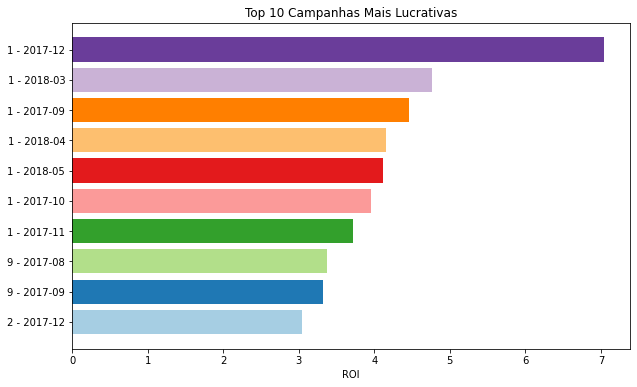

In [231]:
top_campaigns = gain_making_campaigns.nlargest(10, 'ROI')[::-1]
top_campaigns['source_id'] = top_campaigns['source_id'].astype(str)
top_campaigns['month'] = top_campaigns['month'].astype(str)

fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.Paired(range(len(top_campaigns)))
y_pos = range(len(top_campaigns))

labels = top_campaigns['source_id'] + " - " + top_campaigns['month']

plt.barh(y_pos, top_campaigns['ROI'], color=colors)
plt.yticks(y_pos, labels)
plt.xlabel('ROI')
plt.title('Top 10 Campanhas Mais Lucrativas')

plt.show()

Já nas campanhas que mais foram bem sucedidas, temos em grande destaque a campanha 1 e 9 como as que mais geraram receita. A Campanha 1 teve em 2017-12 um ROI excepcional de 7x de lucro sobre o valor investido, e evidentemente é uma campanha que é um sucesso e deve ter sua continuidade. A campanha 9 também apresentou grandes resultados em pelo menos 5 meses do ano com um grande retorno sobre o valor investido em marketing. 

## Conclusão

Passo 3. Escreva uma conclusão: recomende aos especialistas de marketing quanto dinheiro e onde seria melhor investir.
Quais origens/plataformas você recomendaria? Fundamente sua escolha: em quais métricas você se concentrou? Por quê? Que conclusões você tirou ao encontrar os valores das métricas?

Iniciei o projeto realizando a importação de dados e bibliotecas, explorando os dados e alterando os tipos de dados para que estivessem no formato adequado para não sobrecarregar as analises e enriquencendo os dataframes com novas colunas de períodos diferentes. 

Após isso, conseguimos realizar diversas analises e identificar o comportamento dos usuários, frequência de uso, comprimento de sessão. Com isso, podemos tirar várias conclusões que orientarão nossas recomendações para os especialistas de marketing:

**Média de Usuários e Sessões por Dia, Semana e Mês:** O número médio de usuários por mês é significativamente maior do que por dia e semana. Isso sugere que o conteúdo ou as campanhas de marketing que atraem os usuários são eficazes, mas é importante manter um fluxo de novos usuários para manter este crescimento mensalmente.

**Frequência de Retorno de Usuários:** A frequência média com que os usuários retornam é relativamente baixa, menos de 4 vezes por mês. Isso indica que é fundamental analisar mais afundo afim de tornar a experiência do usuário mais atraente e empongante para reter usuários e incentivá-los a retornar mais frequentemente, e conseqüentemente fidelizar nossos clientes além de trazer novos, e isso pode ser possível por meio de estratégias de engajamento e retenção.

**Quantidade Média de Pedidos por Cliente:** Os clientes fazem em média cerca de 1,31 pedidos durante o período de Outubro de 2017 a Fevereiro 2018, que é um valor relativamente baixo de compras por clientes  e é algo que podemos melhorar utilizando estratégias de retenção. Muito mais do que divulgar nosso serviço para novos clientes, precisamos reter melhor os clientes que já compraram conosco, tendo mais proximidade, entendendo o que os clientes desejam e quais produtos eles desejam, pedindo a opinião de nossos clientes para entender onde podemos melhorar e tornar a experiência dele cada vez melhor e conseqüentemente aumentando as médias de acesso do usuário, e isso fatalmente trará um aumento significativo e uma retenção maior de acessos e principalmente de pedidos.  

**LTV (Valor Vitalício do Cliente):** O LTV é relativamente baixo mas isso pode ser aumentado a medida que a fidelização de clientes a longo prazo for melhorada,e conforme nossos clientes permanecem ativos, sua quantidade de pedidos aumentam, seu valor aumenta. Portanto, estratégias para manter os clientes envolvidos podem ser altamente lucrativas a longo prazo.

**Custo de Aquisição de Cliente (CAC):** O CAC total é de $9,01, um ponto importante para entender o custo de aquisição de um novo cliente. É vital manter o CAC o mais baixo possível, e para melhorar isso, precisamos direcionar nossos investimentos para as campanhas que deram certo e se isso fosse feito, provavelmente teriamos um CAC inferior ao que tivemos. Então, otimizar os investimentos em marketing e direcionar para as melhoras e mais efetivas campanhas é o caminho que pode ajudar a reduzir o CAC e obter lucros melhores. 

**Retorno sobre Investimento (ROI):** O ROI geral foi de -23,42%, resultado que foi causado diretamente pelo grande investimento e baixo retorno obtido na campanha 3. As campanhas 1 e 9 se destacaram positivamente com ROI mais alto que as demais inclusive e demonstrando que são fontes lucrativas de aquisição de clientes e que devemos investir valor nessas campanhas.

**Gastos por Origem/Plataforma:** Os gastos de marketing variam significativamente por origem/plataforma, com a origem 3 tendo os custos mais altos, porém com um grande impacto negativo devido o baixo retorno de investimento. A recomendação é otimizar os gastos, concentrando-se nas origens/plataformas que apresentam melhor desempenho em termos de ROI.

***Com base nas conclusões acima, as recomendações são as seguintes:***

**Investimento em Campanhas de Alto ROI:** Priorize as campanhas 1 e 9 que mostraram consistentemente ROI positivo. Continue investindo nessas campanhas, pois elas têm o potencial de gerar lucros significativos.

**Redução de Investimento na Campanha 3:** Devido à grande parcela de contribuição para o ROI negativo, sugerimos uma revisão cuidadosa da Campanha 3. Pode ser benéfico reduzir os investimentos nessa campanha ou reaver sua campanha para otimizá-la e melhorar o desempenho.

**Diversificação e Experimentação:** Não investir grande parte do investimento em marketing em somente uma campanha. Devemos  explorar novas origens/plataformas de aquisição de clientes e testar campanhas com investimentos menores antes de escalá-las e aumentar os valores investidos em cada campanha.

**Foco na Retenção de Clientes:** Concentrar-se em estratégias de engajamento e retenção para incentivar os clientes a acessarem com mais frequência e a realizarem compras mais frequentes, isso nos ajudará no longo prazo e aumentará nosso LTV.

**Acompanhamento Contínuo:** Mantenha um monitoramento constante das métricas e faça ajustes à medida que novos dados e tendências surgirem. O mercado e o comportamento do cliente estão em constante evolução.

**Investimento Sazonal:** Podemos aproveitar os meses com maior ROI, como dezembro, para alocar mais recursos em campanhas de marketing.
